<a href="https://colab.research.google.com/github/udayameister/CST-GNN/blob/main/fmri_preprocess_AAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install nibabel dipy nilearn networkx nibabel

In [11]:
import nibabel as nib
import numpy as np
from nilearn.image import clean_img, resample_to_img
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt

In [12]:
# Define file paths
fmri_path = '/content/sub-CON02_ses-preop_task-rest_bold.nii.gz'
aal_atlas_path = '/content/AAL.nii.gz'

In [13]:
# Load the fMRI functional image
fmri_img = nib.load(fmri_path)

In [14]:
# Load AAL atlas and resample to fMRI image space
aal_atlas = nib.load(aal_atlas_path)
aal_resampled = resample_to_img(aal_atlas, fmri_img, interpolation='nearest')

In [15]:
# Clean the fMRI data (detrend, standardize, and perform nuisance signal regression)
fmri_cleaned = clean_img(fmri_img, detrend=True, standardize=True, low_pass=0.1, high_pass=0.01, t_r=2.0)

In [16]:
# Create a masker object to extract time series data from the regions
masker = NiftiLabelsMasker(labels_img=aal_resampled, standardize=True, detrend=True)

In [17]:
# Extract the time series for AAL regions
time_series = masker.fit_transform(fmri_cleaned)

In [18]:
# Calculate the connectome matrix using correlation
correlation_measure = ConnectivityMeasure(kind='correlation')
connectome_matrix = correlation_measure.fit_transform([time_series])[0]

In [19]:
# Save the connectivity matrix
np.save('connectome_matrix_fmri.npy', connectome_matrix)

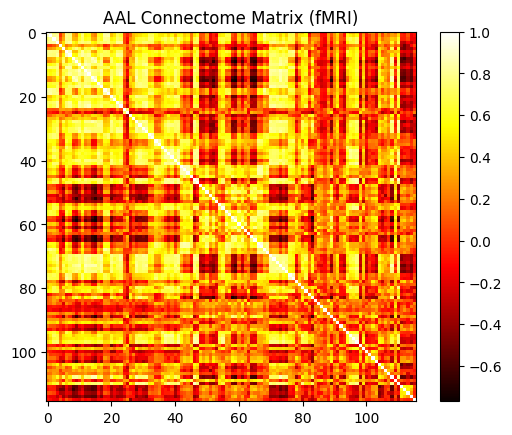

fMRI preprocessing and connectome matrix construction complete.


In [20]:
# Visualize the connectivity matrix
plt.imshow(connectome_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('AAL Connectome Matrix (fMRI)')
plt.show()

print("fMRI preprocessing and connectome matrix construction complete.")